# DNSC 6303-10: PROGRAMMING FOR ANALYTICS - S_05

# What is Cluster Analysis?

+ Finding groups of objects such that the objects in a group will be similar (or related) to one another and different from (or
unrelated to) the objects in other groups

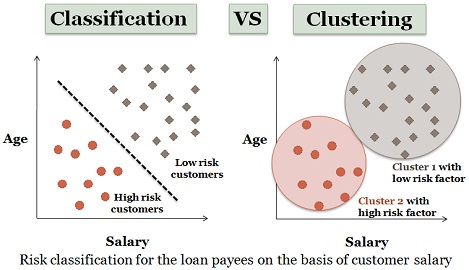

In [1]:
# classification algorithm
# prediction algorithm


# unsupervised ML: "Why it happened?" - clustering. 

# vs. supervised ML: "What is happing?"


# example: "exploratory analysis" desktop computer system with high speed purchase - Amazon vs. BestBuy

# 1. desktop
# 2. budget: 1,000-2,000
# 3. brand: DELL, HP, Asus
# 4. Processor: intel Core i7
# 5. Storage: 500GB and up
# 6. Condition: New
# 7. Ratings: four and up

# --- we have clustered depending on the different features.
# --- grouping based on the common features.
# --- consider 'the potential buyers' and finding by clustering. 


# How does it work ?

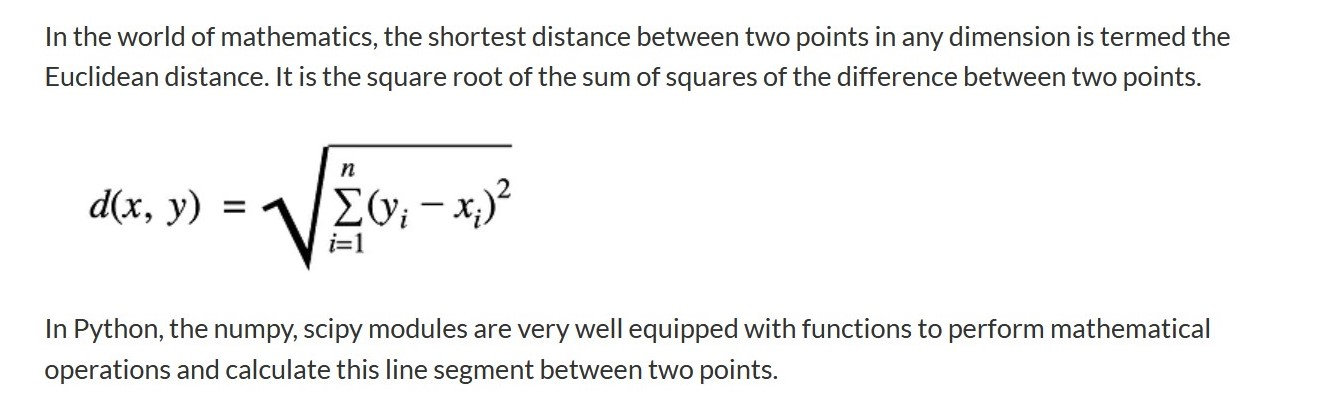

+ Euclidian: The euclidean distance is the shortest distance between two points

In [2]:
# intracluster: the more minimize the closest distance, the better the clustering is.
# vs.
# intercluster: should be maximized. 

# i.e. customer segmentation, bio, market profiling, ... 

In [3]:
# important to know clarity of conceptual knowledge difference between superv. vs. unsuperv.

# two types of clustering

#1. hierachical: top to bottom// set of nested clusters to include all the observations. 
# graphical: dandergram -- don't tell how much, but the number of level of clusters. 

#2. non-hierachical/ K-means: partitioning method/ random-seed technique
# generate random seeds (in clustering/unsupervised learning: with many iterations,
# observations will be in near to the centers based on the similarity )
# cf. KNN algorithm (it is supervised learning with outcome variables with labeled data- they are different! )
# how to define the optimal number of clusters? the logic behind: sume of squares



In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
# customer segmentation 
# Task1: Read the "Income Data.csv" file
customers_df = pd.read_csv("Income Data.csv")

In [6]:
# Quick glimpse of the data 
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [7]:
# Task 2: Find the max value of the income and age
customers_df.max()

income    60200.0
age          50.4
dtype: float64

In [8]:
# Task 3: Find the min value of the income and age
customers_df.min()

income    3100.0
age         26.7
dtype: float64

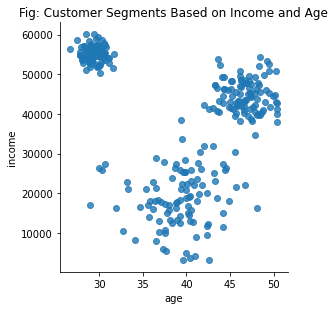

In [9]:
# Task 4: plot data and regression model fits
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4);
plt.title( "Fig: Customer Segments Based on Income and Age");

# if we were going to do a thanksgiving marketing for apple gears, we will target cluster 1! 


## K-means Clustering

In [10]:
# Task 5: Create clusters

# if we don't want to rely on algorithm for the number of clustering,
# scientists can decide on the number herself, as below.

# minimize error to increase accuracy

from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [11]:
customers_df["clusterid"] = clusters.labels_

In [12]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,1
1,54100.0,28.10,2
2,47800.0,46.75,1
3,19100.0,40.25,0
4,18200.0,35.80,0


In [13]:
print(customers_df.max()) 

income       60200.0
age             50.4
clusterid        2.0
dtype: float64


In [14]:
#sum of square = euclidean distance. 
a = np.sqrt(((41100)**2) - ((48.75)**2))
a

41099.97108803727

### Normalizing the features

In [15]:
# Task 6: Preprocessing: standardization / normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
scaled_customers_df[0:5]

# the values have equal contribution in same scale. 
# should preceed before any clustering.

# normalization = (income - avg. income) / std. income

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [16]:
# Task 7: Create clusters after standardization
# non-hierachical technique
from sklearn.cluster import KMeans

clusters_new = KMeans( 3, random_state=42 ) # find first centroid - pass any integer for random state
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

In [17]:
# Task 8: Check the centers of the clusters 
clusters.cluster_centers_

array([[1.81447917e+04, 3.91744792e+01],
       [4.30539326e+04, 4.64191011e+01],
       [5.46756522e+04, 3.17004348e+01]])

In [18]:
# Task 9: Cluster Centers and Interpreting the Clusters

In [19]:
customers_df.groupby( 'clusterid' )['age','income'].agg( ["mean",'std'] ).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  39.174479  3.626068  18144.791667  6745.241906
1         1  46.419101  2.289620  43053.932584  3613.769632
2         2  31.700435  6.122122  54675.652174  2362.224320

In [20]:
# if I don't normalize my data - what impact will it have? -- income will have the skewness. 

## CASE 2 - Market segmentation - Creating Product Segments - Beer Dataset
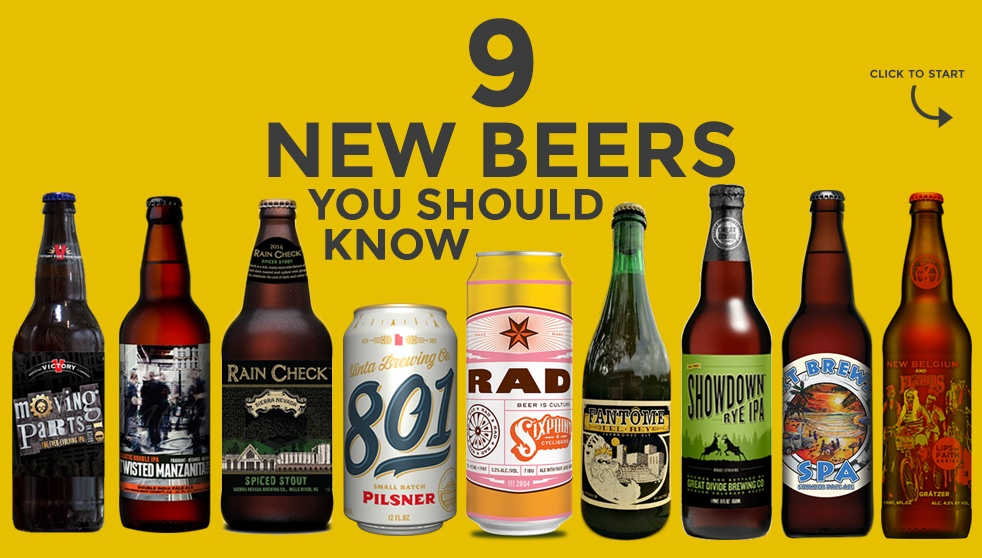

In [21]:
# Task 10: Read the "beer.csv" file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline
beer_df = pd.read_csv('beer.csv')

In [22]:
# Task 11: Quick glimpse of the data 
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [23]:
# Task 12: Preprocessing/need of standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

#### NO. of Clusters - Using Dendrogram
+ A dendrogram is a diagram that shows the hierarchical relationship between objects. 

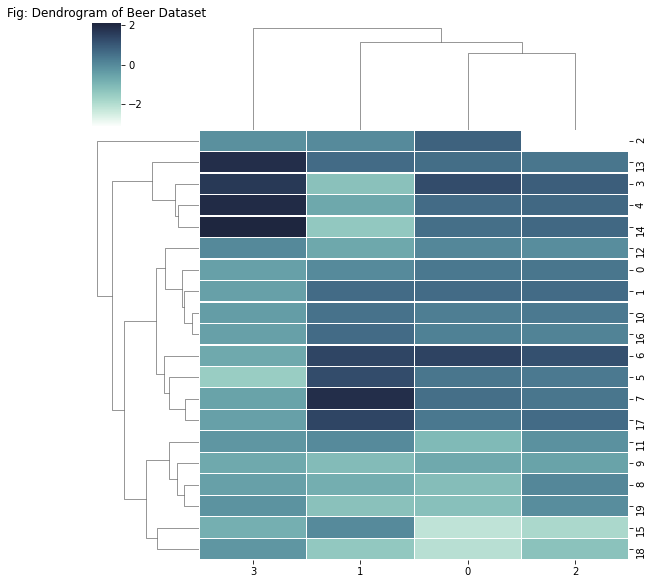

In [24]:
# dendrogram & heatmap are often used for visualization of correlations
# dendrogram doesn't tell the number of clusters
# dendrogram is good for smaller data & it says how the clusters are formed based on the correlations

# (10,16)))) hierachical information 

# Task 13: Create Dendrogram 
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
plt.title( "Fig: Dendrogram of Beer Dataset");

In [25]:
beer_df.iloc[[10,16]] #same level, similar

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [26]:
beer_df.iloc[[2,18]] #opposite level, very different

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


# Task 14: Finding Optimal Number of Clusters using Elbow Method

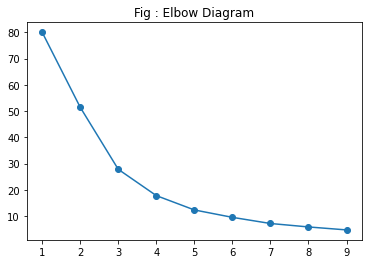

In [27]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_beer_df )
    cluster_errors.append( clusters.inertia_ ) # represent assumptions errors follow standard normal distribution
    
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig : Elbow Diagram");

# x = number of clusters, y = error term
# cluster 1 to 2: incremental decrease of error term
# cluster 2 to 3: still incremental
# clster 3 to 4: steep decrease
# cluster 4 to 9: significant decrease

# the graph looks like 'arm/elbow' - we will find the point where 'the elbow' bend happens: here it is 3 

In [28]:
# Task 15: Normalizing Features - Rescaling the dataset

In [29]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )

In [30]:
# Task 16: Creating Clusters

In [31]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

# Task 17: Interpreting the Clusters

##### Cluster 0

In [32]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


##### Cluster 1

In [33]:
beer_df[beer_df.clusterid == 1] #2: outlier for alcohol # clustering doesn't do a good job! 

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


##### Cluster 2

In [34]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


# Hierarchical clustering

In [35]:
# Task 18: Use AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [36]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [37]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [38]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [39]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


In [40]:
# Task 19: Find the largest clusters
beer_df.groupby([beer_df.h_clusterid]).size()

h_clusterid
0    8
1    8
2    4
dtype: int64

# Inclass Practice: Read the "Country clusters"

In [41]:
# Task 20: Load the 'Country clusters.csv'
data = pd.read_csv('Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [42]:
# Task 21:  Normalizing Features - Rescaling the dataset

In [43]:
scaler = StandardScaler()
scalerd_country_df = scaler.fit_transform(data[['Latitude','Longitude']])

In [44]:
# Task 22:  Creating Clusters
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit(scalerd_country_df  )
data["clusterid"] = clusters.labels_

In [45]:
# Task 24:  Find the largest clusters = cluster 0
data[data.clusterid == 0]

,Country,Latitude,Longitude,Language,clusterid
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0


In [46]:
# Find the largest clusters = cluster 1
data[data.clusterid == 1]

,Country,Latitude,Longitude,Language,clusterid
5,Australia,-25.45,133.11,English,1


In [47]:
# Find the largest clusters = cluster 2
data[data.clusterid == 2]

,Country,Latitude,Longitude,Language,clusterid
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2


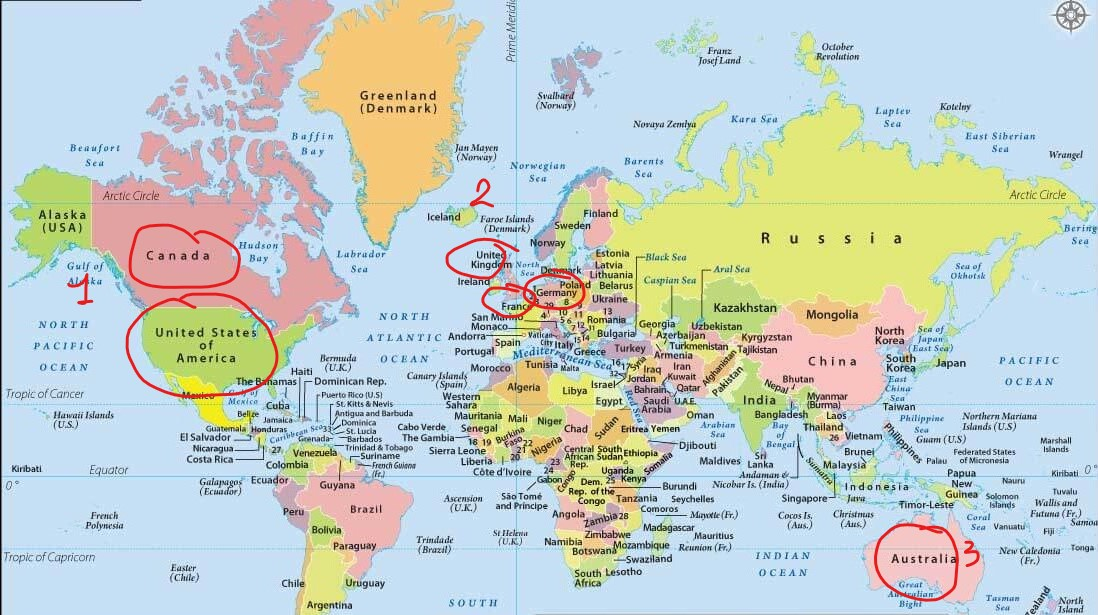

# Task 25:Task for BB Week05 Blog: map 'Language',  'English':0, 'French':1,'German':2 and re run the clustering (k=3) and  Plot the data using the longitude and the latitude
# Convert categorical data 

In [50]:
# Load the 'Country clusters.csv'
data2 = pd.read_csv('Country clusters.csv')
data2 = data2.replace({"English":0, "French":1, "German":2})
data2

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [51]:
# Normalize features - scaling the dataset
scaler = StandardScaler()
scalerd_country_df = scaler.fit_transform(data2[['Latitude','Longitude']])

In [52]:
# Create Clusters
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit(scalerd_country_df  )
data2["clusterid"] = clusters.labels_

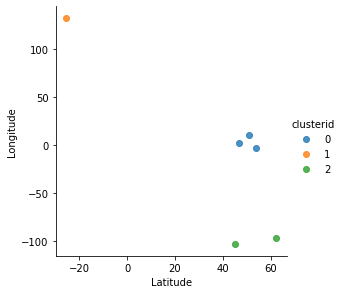

In [54]:
# Plot data
sn.lmplot( "Latitude", "Longitude", data=data2, fit_reg = False, size = 4, hue="clusterid");

In [58]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


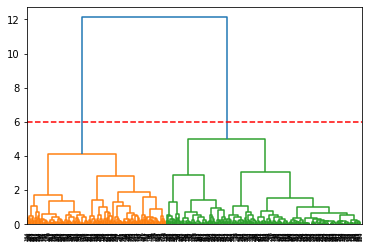

In [59]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
dend = shc.dendrogram(shc.linkage(data_scaled, method ='ward'))
plt.axhline(y=6, color='r',linestyle='--')

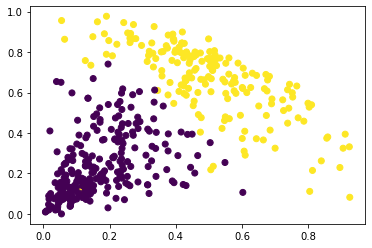

In [63]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

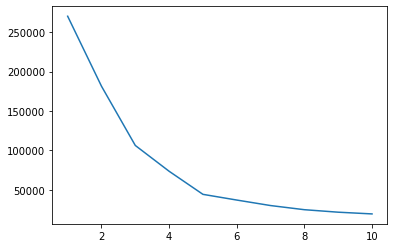

In [67]:
dataset = pd.read_csv('question4.csv')
X = dataset.iloc[:,[3,4]].values
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.show()

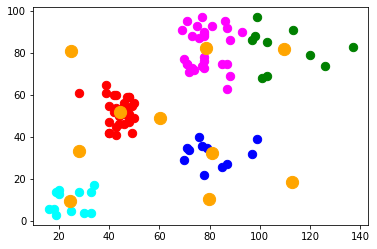

In [68]:
kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 70, c = 'red', label = 'Target')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 70, c = 'blue', label = 'Target')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 70, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 70, c = 'cyan', label = 'Target')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 70, c = 'magenta', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=150,c='orange')
plt.show()

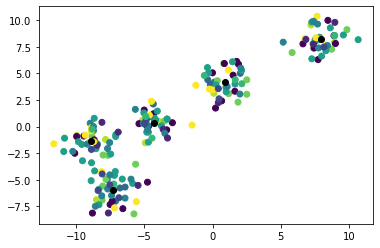

In [72]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=200,centers=5,n_features=2,random_state=3)
kmean=KMeans(n_clusters=5)
kmean.fit(x)
center=kmean.cluster_centers_
y_pred=kmeans.labels_
plt.scatter(x[:,0],x[:,1], c=y_pred)
plt.scatter(center[:,0],center[:,1],color="black")
plt.show()